In [2]:
from functions import dgp, two_sls
import numpy as np 
import matplotlib.pyplot as plt

[[0.99785457]]
[[9.75068794e-05]]


### 4. Weak Instruments


In [27]:
n = 10000
β = 1 
π = 1

b = np.empty(0)
V = np.empty(0)
for i in range(1000):
    x, y, Z = dgp(n, β, π)
    tmpb, tmpV = two_sls(x, y, Z)
    b = np.append(b, np.squeeze(tmpb))
    V = np.append(V, np.squeeze(tmpV))


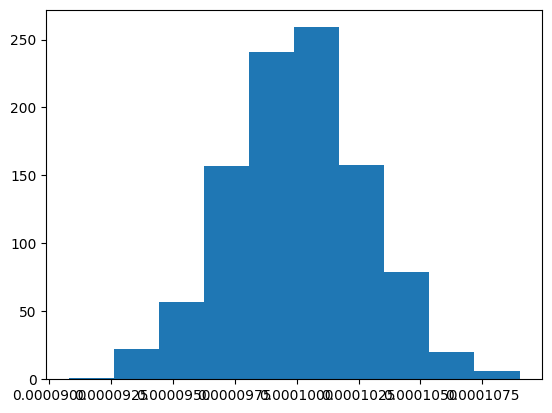

In [29]:
plt.hist(V)
plt.show()